/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_27668/352470401.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


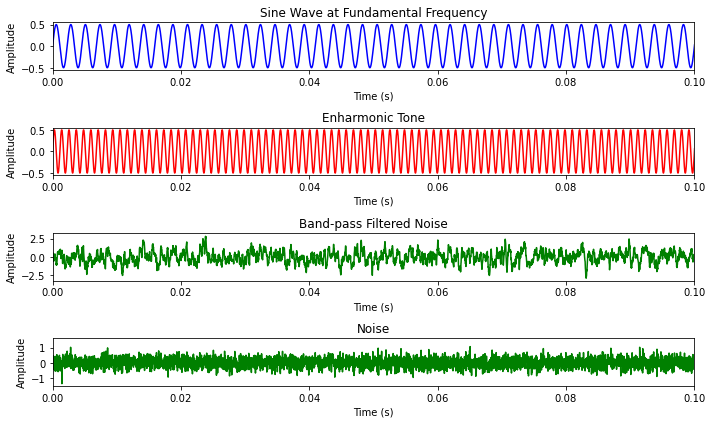

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
duration = 1.0  # Duration of the sound in seconds
sampling_rate = 44100  # Sampling rate in Hz
frequency = 440  # Fundamental frequency of the sine wave in Hz
amplitude = 0.5  # Amplitude of the sine wave
bandwidth = 1000  # Bandwidth of the band-pass filtered noise in Hz
noise_amplitude = 0.3  # Amplitude of the noise
enharmonic_frequency = 2 * frequency  # Frequency of the enharmonic tone

# Generate time array
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate components of the Risset drum sound
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)
bandpass_noise = noise_amplitude * np.random.normal(size=len(t))
bandpass_filter = np.exp(-0.5 * (2 * np.pi * bandwidth * t) ** 2)
filtered_noise = np.convolve(bandpass_noise, bandpass_filter, mode='same')
enharmonic_tone = amplitude * np.sin(2 * np.pi * enharmonic_frequency * t)

# Plot the components
fig, axs = plt.subplots(4,1, figsize=(10, 6))

ax = axs[0]
ax.plot(t, sine_wave, color='blue')
ax.set_title('Sine Wave at Fundamental Frequency')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

ax = axs[1]
ax.plot(t, enharmonic_tone, color='red')
ax.set_title('Enharmonic Tone')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

ax = axs[2]
ax.plot(t, filtered_noise, color='green')
ax.set_title('Band-pass Filtered Noise')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

# plt.subplot(3, 1, 3)
ax = axs[3]
ax.plot(t, bandpass_noise, color='green')
ax.set_title('Noise')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')



for ax in axs: ax.set_xlim(0,0.1)
fig.tight_layout()
fig.show()


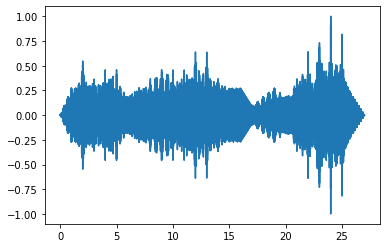

In [66]:
class Track:
    """
    A class representing an audio track.
    """

    def __init__(self, data=None, amplitude=1.0, position=0.0, name=''):
        """
        Initializes a Track object.

        Args:
            data (numpy.ndarray): An array of float representing the audio data.
            amplitude (float or numpy.ndarray): The amplitude of the audio track.
            position (float): The time offset indicating when the track starts.
            name (str): The name of the track.
        """
        self.data = data
        self.amplitude = amplitude
        self.position = position
        self.name = name
    

class Mixer:
    """
    A class representing a mixer for audio tracks.
    """

    def __init__(self, sample_rate=44100):
        self.tracks = []
        self.sample_rate = sample_rate

    def add(self, track):
        """
        Adds a Track object to the mixer.

        Args:
            track (Track): A Track object to be added to the mixer.
        """
        self.tracks.append(track)
        
    def _normalize_signal(self, y):
        max_val = np.max(np.abs(y))
        if max_val == 0: return y  # avoids division by zero
        return y / max_val

    def get_mix(self):
        """
        Mixes all tracks together and returns the mixed audio data.

        Returns:
            numpy.ndarray: The mixed audio data.
        """
        # Find the maximum length of tracks
        max_length = max(track.data.shape[0] + int(track.position * self.sample_rate) for track in self.tracks)
        
        # Initialize an array to hold the mixed audio data
        mixed_data = np.zeros(max_length)
        
        # Mix each track
        for track in self.tracks:
            start_idx = int(track.position * sample_rate)
            end_idx = start_idx + track.data.shape[0]
            mixed_data[start_idx:end_idx] += track.data * track.amplitude
        
        return np.linspace(0,len(mixed_data)/self.sample_rate, len(mixed_data)), self._normalize_signal(mixed_data)


length = 30
t = np.linspace(0, length, length*44100)
mixer = Mixer()

for i in range(length * 2):
    freq = 200 + np.random.randint(80)
    set_in = np.random.randint(length-5)
    y  = np.sin(np.linspace(0,3,3*44100) * freq * (np.pi * 2))
    amp = np.concatenate(( np.linspace(0,1,44100), np.ones(44100), np.linspace(1,0,44100)))
    mixer.add(Track(y,amp,set_in, freq))
    
t,y = mixer.get_mix()

fig, ax = plt.subplots()
ax.plot(t,y)

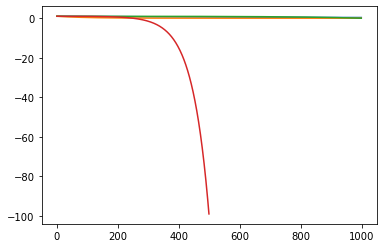

In [47]:
import numpy as np

def generate_envelope(sample_rate=44100, duration=2.7):
    # Calculate the number of samples
    num_samples = int(sample_rate * duration)
    
    # Time arraya
    t = np.linspace(0, duration, num_samples)
    
    # Attack phase (linear)
    attack_samples = int(0.2 * sample_rate)
    attack = np.linspace(0, 1, attack_samples)
    
    # Hold phase
    hold_samples = int(0.5 * sample_rate)
    hold = np.ones(hold_samples)
    
    # Decay phase (exponential)
    decay_samples = num_samples - attack_samples - hold_samples
    decay = np.exp(-5 * (t[attack_samples + hold_samples:] - t[attack_samples + hold_samples]))
    
    # Concatenate the phases
    envelope = np.concatenate((attack, hold, decay))
    
    # Normalize to have maximum amplitude of 1
    envelope /= np.max(envelope)
    
    return envelope

def high(t, sample_rate=44100):
    return np.ones(t * sample_rate)

def low(t, sample_rate=44100):
    return np.zeros(t * sample_rate)

def decay_exp(t, sample_rate=44100):
    '''exponential decay'''
    pass
    
def decay_inv(t, sample_rate=44100):
    '''inverse exponential decay'''
    pass

def decay_lin(t, sample_rate=44100):
    return np.linspace(0,1,t*sample_rate)
    
    
def generate_envelope2(sample_rate=44100, duration=2.7):
    # Calculate the number of samples
    num_samples = int(sample_rate * duration)
    
    # Time array
    t = np.linspace(0, duration, num_samples)
    
    # Attack phase (exponential)
    attack_tau = 0.8  # Time constant for the attack phase
    attack = 1 - np.exp(-t[:int(attack_tau * sample_rate)] / attack_tau)
    
    # Attack phase (exponential)
    attack_tau = 0.2  # Time constant for the attack phase
    attack_tau = 1
    attack = 1 - np.exp(-10 * t[:int(attack_tau * sample_rate)] / attack_tau)
    
    
    # Hold phase
    hold_samples = int(0.5 * sample_rate)
    hold = np.ones(hold_samples)
    
    # Decay phase (inverse exponential)
    decay_tau = 1  # Time constant for the decay phase
    decay_tau = 2  # Time constant for the decay phase
    decay = np.exp(-5 * (t[int(0.2 * sample_rate) + hold_samples:] - t[int(0.2 * sample_rate) + hold_samples]) / decay_tau)
    
    # Concatenate the phases
    envelope = np.concatenate((attack, hold, decay))
    
    # Normalize to have maximum amplitude of 1
    envelope /= np.max(envelope)
    
    return envelope

# # Example usage
sample_rate = 44100
# duration = 2.7
# envelope  = generate_envelope(sample_rate, duration)
# envelope2 = generate_envelope2(sample_rate, duration)

resolution = 1000
t = np.linspace(0,1,resolution)
y = np.exp(-1 * t)


def decay(time, threshold=0.01, sample_rate=44100):
    t = np.linspace(0, 1, int(time*sample_rate))
    return ((1/threshold) - np.exp((-np.log(threshold) / time) * t) ) * threshold
    # # Decay phase (exponential)
    # decay_samples = num_samples - attack_samples - hold_samples
    # decay = np.exp(-5 * (t[attack_samples + hold_samples:] - t[attack_samples + hold_samples]))
    
    
    

# resolution = 1000
# t = np.linspace(0, 1, resolution)
threshold = 0.01  # 1% threshold
decay_time = 1.0  # time at which the decay reaches the threshold

y = exponential_decay_with_threshold(t, threshold, decay_time)



# x = np.linspace(-2*np.pi, 2*np.pi, 100)
# xx = x + 1j * x[:, np.newaxis] # a + ib over complex plane
# out = np.exp(x)
fig, ax = plt.subplots()
# ax.plot(x,out)
# ax.plot(envelope)
envelope = np.exp(-1 * t)
ax.plot(envelope)
envelope = np.exp(-1 * t * 10)
ax.plot(envelope)


envelope = decay(1, sample_rate=1000)
ax.plot(envelope)
envelope = decay(.5, sample_rate=1000)
ax.plot(envelope)